In [2]:
import pandas as pd
import datetime
import time
import pickle
import os
import numpy as np
import vitaldb


In [3]:
df_match = pd.read_csv('ftn+_age_match_20201224-Copy1.csv',sep=',')
df_match['NRS_time']=pd.to_datetime(df_match['NRS_time'])
df_match = df_match.rename(columns={'Unnamed: 0':'index'})
#df_match.reset_index(inplace=True, drop=True)

print(len(df_match))

srate= 100
for i in range(len(df_match)):
    filename = str(df_match.loc[i,'Value'])+','+str(df_match.loc[i,'index'])+','+ df_match.loc[i,'path']
    if True:
        print(i, end=' ')
        i = 1890
        rec_path = '../../../cranberry2/Preprocessing/vital_data/pacu_full_vital/'+ 'PACU1_2_190828_105401.vital'#df_match.loc[i,'path']
        print(rec_path)
        #print('1')
        vfile_ecg = vitaldb.vital_recs_time(rec_path,['SNUADCW/ECG_II'],interval=0.01).flatten()
        vfile_ppg = vitaldb.vital_recs_time(rec_path,['SNUADCW/PLETH'],interval=0.01).flatten()

        #print(vfile)
        if len(vfile_ecg[0])==0 | len(vfile_ppg[0])==0:
            print('index ',df_match.loc[i,'index'],' OPID ',df_match.loc[i,'opid'],'empty vital file')
        else:
            Abs_time = [vfile_ecg[1]+datetime.timedelta(hours=9)+datetime.timedelta(seconds=i/srate) for i in range(len(vfile_ecg[0]))]
            #print(vfile[1])
            dics = {'Abs_time':Abs_time,'PPG':vfile_ppg[0],'ECG':vfile_ecg[0]}
            df_vital = pd.DataFrame(data=dics)
            end_idx_list = df_vital[(df_vital['Abs_time'] > df_match.loc[i,'NRS_time'] - datetime.timedelta(seconds=1)) & (df_vital['Abs_time'] < df_match.loc[i,'NRS_time'] + datetime.timedelta(seconds=1))].index.tolist()

            if len(end_idx_list)==0:
                print('index ',i,' OPID ',df_match.loc[i,'opid']," no vital data at NRS time")

            else:
                end_idx=end_idx_list[0]+1
                start_idx= end_idx - 5 * 60 * srate
                start_idx_n = max(0,start_idx)


                ext = df_vital[start_idx_n:end_idx]
                extr=ext.dropna(subset=['ECG'])
                extr=extr.drop_duplicates(subset=['ECG'])

                if len(extr)>1:
                    if start_idx <0 :
                        fit = (-1)*end_idx 
                        extraction = pd.DataFrame(index=range(5*60*srate),columns=['Abs_time','PPG','ECG'])
                        extraction[fit:]=ext
                        

                    else:
                        extraction = ext
            break

10156
0 ../../../cranberry2/Preprocessing/vital_data/pacu_full_vital/PACU1_2_190828_105401.vital


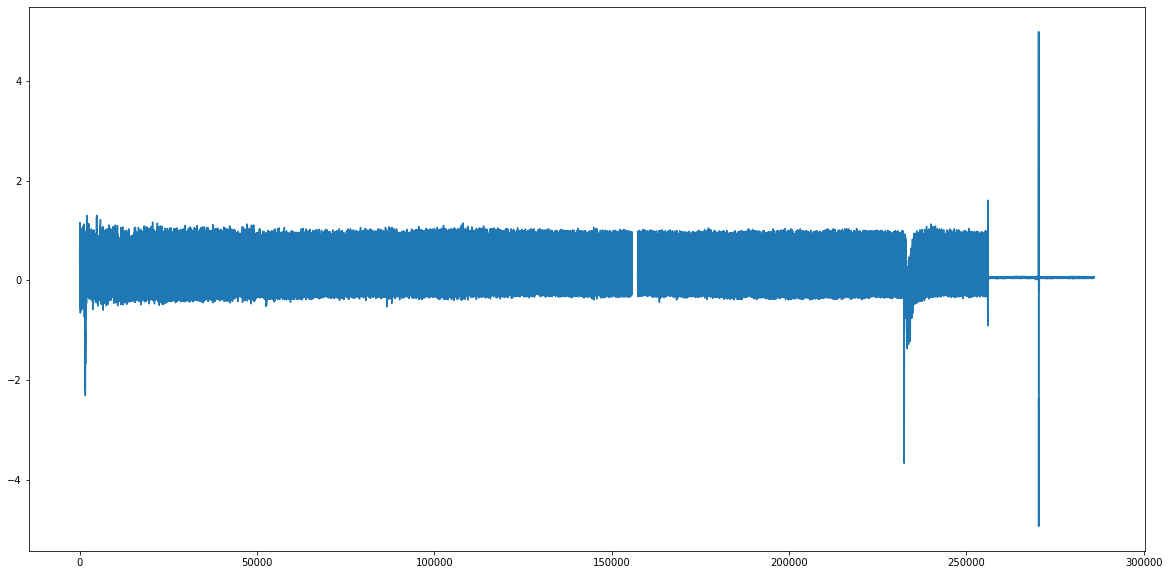

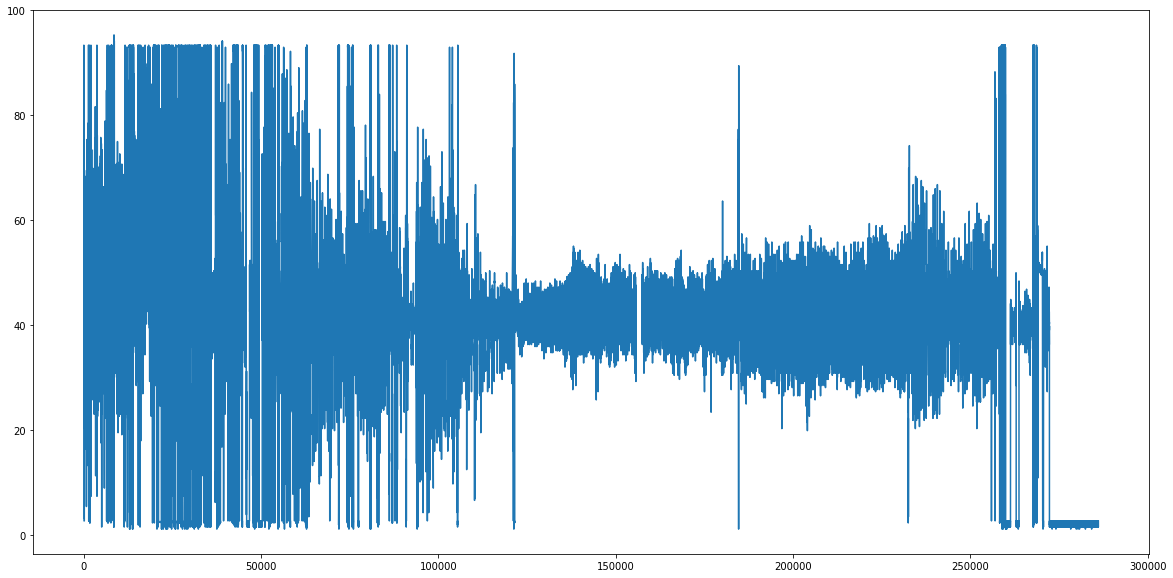

In [4]:
import matplotlib.pyplot as plt


plt.figure(figsize=(20,10))
plt.plot(vfile_ecg[0])

plt.figure(figsize=(20,10))
plt.plot(vfile_ppg[0])